In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")

import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = "Month")
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [4]:
df.columns

Index(['#Passengers'], dtype='object')

In [5]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
df.isnull().sum()

#Passengers    0
dtype: int64

In [7]:
df['1960' :]

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


# Visualizing the data 

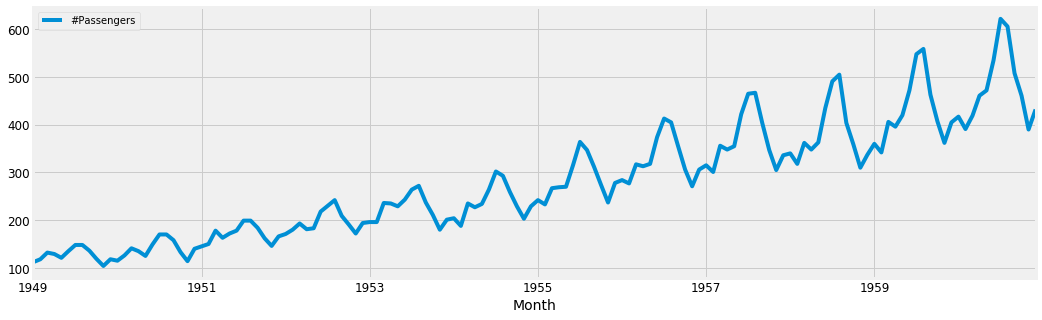

In [8]:
df.plot(figsize = (16, 5))
plt.show()

In [9]:
x = df.index
y1 = df['#Passengers'].values

Since all values are positive, you can show this on both sides of the Y axis to emphasize the growth.

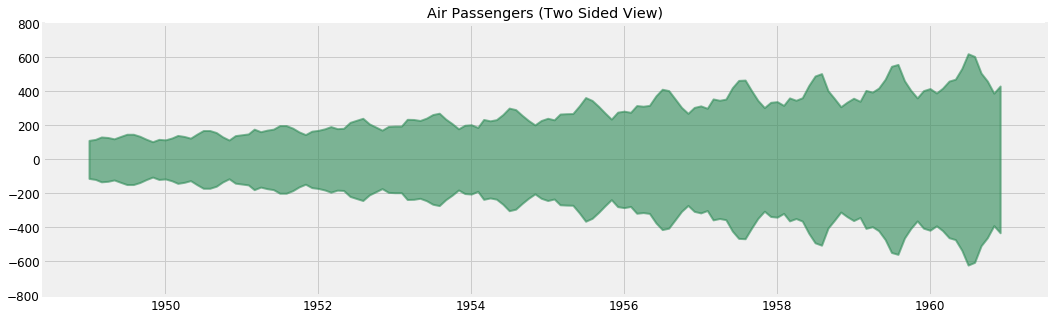

In [10]:
plt.figure(figsize = (16, 5))
plt.fill_between(x = x, y1 = y1, y2 = -y1, alpha = 0.6, color = 'seagreen', linewidth = 2)
plt.title('Air Passengers (Two Sided View)')
plt.ylim(-800, 800)
plt.show()

AirPassengers appears to be multiplicative time series as the passenger numbers increase, it appears so does the pattern of seasonality.

<Figure size 1296x576 with 0 Axes>

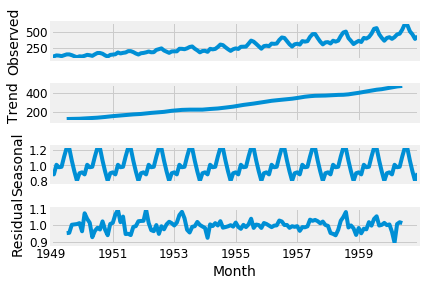

In [11]:
plt.figure(figsize = (18, 8))
decomposition = sm.tsa.seasonal_decompose(df, model = "multiplicative")
decomposition.plot()
plt.show()

# TEST STATIONARITY OF THE TIME SERIES

A stationary time series has the conditions that the mean, variance and covariance are not functions of time. In order to fit arima models, the time series is required to be stationary. We will use two methods to test the stationarity.

1. Test stationarity of the time series (ADF)

In order to test the stationarity of the time series, let’s run the Augmented Dickey-Fuller Test.
First set the hypothesis test:

The null hypothesis H0 : that the time series is non stationary

The alternative hypothesis HA : that the time series is stationary

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [12]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(time_series):
    print("Results for ADFULLER test:")
    adfullertest = adfuller(time_series)
    adfuller_output = pd.Series(adfullertest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(adfullertest)
    for key, val in adfullertest[4].items():
        adfuller_output['Critical value (%s)'%key] = val
    print(adfuller_output)


adfuller_test(df['#Passengers'])

Results for ADFULLER test:
(0.8153688792060543, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


Test for stationarity: If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

In our above example, the test statistic > critical value, which implies that the series is not stationary. This confirms our original observation which we initially saw in the visual test.

2 . KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test
KPSS is another test for checking the stationarity of a time series (slightly less popular than the Dickey Fuller test). The null and alternate hypothesis for the KPSS test are opposite that of the ADF test, which often creates confusion.

The authors of the KPSS test have defined the null hypothesis as the process is trend stationary, to an alternate hypothesis of a unit root series. We will understand the trend stationarity in detail in the next section. For now, let’s focus on the implementation and see the results of the KPSS test.

Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).

In [13]:
from statsmodels.tsa.stattools import kpss

def kpss_test(time_series):
    print("Results of KPSS Test")
    kpsstest = kpss(time_series)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    print("kpss tst: ", kpsstest)
    for key, val in kpsstest[3].items():
        kpss_output['Critical value (%s)'%key] = val
    print(kpss_output)

kpss_test(df['#Passengers'])

Results of KPSS Test
kpss tst:  (1.0521750110135097, 0.01, 14, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
Test Statistic            1.052175
p-value                   0.010000
Lags Used                14.000000
Critical value (10%)      0.347000
Critical value (5%)       0.463000
Critical value (2.5%)     0.574000
Critical value (1%)       0.739000
dtype: float64


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Test for stationarity: If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary). For the air passenger data, the value of the test statistic is greater than the critical value at all confidence intervals, and hence we can say that the series is not stationary.

*IMPORTANT* : the ADF test has an alternate hypothesis of linear or difference stationary, while the KPSS test identifies trend-stationarity in a series.

# Making a Time Series Stationary

1. Differencing
In this method, we compute the difference of consecutive terms in the series. Differencing is typically performed to get rid of the varying mean. Mathematically, differencing can be written as:

yt‘ = yt – y(t-1)

where yt is the value at a time t

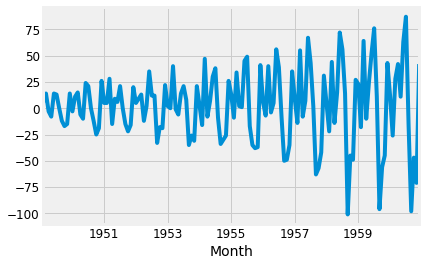

In [14]:
Passengers_diff = df['#Passengers'] - df['#Passengers'].shift(1)
Passengers_diff.dropna().plot()

2. Seasonal Differencing
In seasonal differencing, instead of calculating the difference between consecutive values, we calculate the difference between an observation and a previous observation from the same season. For example, an observation taken on a Monday will be subtracted from an observation taken on the previous Monday. Mathematically it can be written as:

yt‘ = yt – y(t-n)

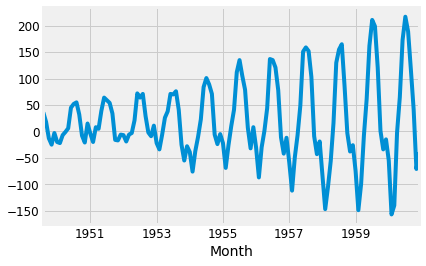

In [15]:
n=7
Passengers_diff = df['#Passengers'] - df['#Passengers'].shift(n)
Passengers_diff.dropna().plot()

Transformation

Transformations are used to stabilize the non-constant variance of a series. Common transformation methods include power transform, square root, and log transform. Let’s do a quick log transform and differencing on our air passenger dataset:

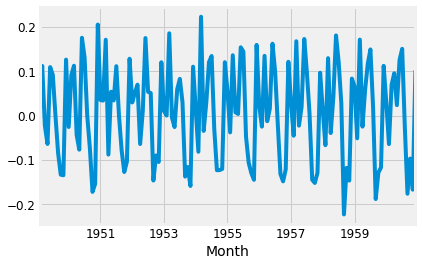

In [16]:
Passengers_log = np.log(df['#Passengers'])
Passengers_log_diff = Passengers_log - Passengers_log.shift(1)
Passengers_log_diff.dropna().plot()

In [17]:
Passengers_log_diff.dropna(inplace = True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [18]:
Passengers_log.dropna(inplace = True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Again applying the ADF and KPSS tests to test the stationarity of TS:

In [19]:
adfuller_test(Passengers_log_diff)
df.head()

Results for ADFULLER test:
(-2.7171305983881595, 0.07112054815085424, 14, 128, {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}, -440.35846985568105)
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical value (1%)             -3.482501
Critical value (5%)             -2.884398
Critical value (10%)            -2.578960
dtype: float64


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


The Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence. We can also take second or third order differences which might get even better results in certain applications.

In [20]:
adfuller_test(Passengers_log)

Results for ADFULLER test:
(-1.7170170891069625, 0.4223667747703904, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -445.3990312497209)
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


In [21]:
kpss_test(Passengers_log_diff)

Results of KPSS Test
kpss tst:  (0.10154458687402602, 0.1, 14, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
Test Statistic            0.101545
p-value                   0.100000
Lags Used                14.000000
Critical value (10%)      0.347000
Critical value (5%)       0.463000
Critical value (2.5%)     0.574000
Critical value (1%)       0.739000
dtype: float64


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1709: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [22]:
kpss_test(Passengers_log)

Results of KPSS Test
kpss tst:  (1.053981419846458, 0.01, 14, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
Test Statistic            1.053981
p-value                   0.010000
Lags Used                14.000000
Critical value (10%)      0.347000
Critical value (5%)       0.463000
Critical value (2.5%)     0.574000
Critical value (1%)       0.739000
dtype: float64


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


The KPSS test statistic is less than the 10% critical value, thus the TS is stationary

# Time Series forecasting with ARIMA

In [23]:
import itertools

p=d=q = range(0,2)

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Examples of parameter cominations for Seasonal ARIMA: ')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter cominations for Seasonal ARIMA: 
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [24]:
y = Passengers_log

In [25]:
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param,
                                           seasonal_order=seasonal_param,
                                           enforce_invertibility=False,
                                           enforce_stationarity=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC: {}'.format(param, seasonal_param, results.aic))
        except:
            continue

E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC: 898.7367486840988
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC: 687.3749017314515
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC: -150.62577301420401


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC: -179.24122974055112
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC: -344.53629719317615


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC: -342.6089190943811


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC: -225.9086914493485


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC: -301.46045597141796


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC: 704.0097395065309


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC: 509.22247300887466
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC: -254.34077322301806


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC: -248.42231756143295


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC: -396.27944661884584


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC: -395.71372433442883


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC: -271.43123351319946


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC: -339.49928501796484
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC: -230.04132958357417


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC: -296.95709212238376
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC: -431.23091221270147


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC: -421.59768092994995
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC: -437.39058517393755

E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC: -462.05750967671077


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC: -414.6592871369118
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC: -413.3367825256651
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC: -234.53795644509867


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC: -295.1391198000951


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC: -442.0383113567648


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC: -435.4435292195939


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC: -450.0243250407366


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC: -472.5933417827474


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC: -437.11591057610525


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC: -428.86966261905513


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC: -231.275600868895


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC: -297.4212776311249
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC: -436.5340234270075


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC: -424.3003055756441


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC: -446.1887351538809


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC: -472.00821849829873


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC: -414.78267989974773


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC: -422.26104078712063
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC: -234.5693109683699


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC: -294.8975250727443
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC: -445.6166176050116


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC: -436.9446087689093


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC: -451.38753065902415


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC: -477.61938658445985


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC: -436.0784509195892


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC: -431.572184492921
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC: -234.20009826267056


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC: -296.65935051312033


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC: -445.41397115453884


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC: -437.5258139927598


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC: -445.9203093802732


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC: -474.8920021101495


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC: -431.33471492834883


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC: -429.7776563197017


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC: -238.0941379081429


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC: -299.17913608681255


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC: -440.3039035266828


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC: -433.78514748587344


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC: -444.73692484864705


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC: -471.13306532940663


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC: -431.4799801938077


E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC: -427.03455787426907


In [26]:
#Another method is to put the values of AIC in a DataFrame and find the min AIC value and corresponding params

AIC_df = pd.DataFrame({}, columns=['params', 'seasonal_params', 'AIC'])

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param,
                                           seasonal_order=seasonal_param,
                                           enforce_invertibility=False,
                                           enforce_stationarity=False)
            results = mod.fit()
            #print('ARIMA{}x{} - AIC: {}'.format(param, seasonal_param, results.aic))
            temp = pd.DataFrame([[param, seasonal_param, results.aic]], columns=['params', 'seasonal_params', 'AIC'])
            AIC_df = AIC_df.append(temp, ignore_index = True)
            del temp
        except:
            continue

E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib

E:\notebooks\anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\notebooks\ana

In [27]:
min_aic = AIC_df.sort_values(by = 'AIC').iloc[0] #Row with min AIC value
min_aic

params                 (1, 0, 1)
seasonal_params    (1, 0, 1, 12)
AIC                     -477.619
Name: 45, dtype: object

# Fitting the ARIMA Model

In [28]:
mod = sm.tsa.statespace.SARIMAX(y, order = (1,0,1),
                                           seasonal_order=(1,0,1,12),
                                           enforce_invertibility=False,
                                           enforce_stationarity=False)
results = mod.fit()
print(results.summary().tables[1])

E:\notebooks\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9419      0.039     24.102      0.000       0.865       1.019
ma.L1         -0.3803      0.093     -4.092      0.000      -0.562      -0.198
ar.S.L12       1.0200      0.003    302.487      0.000       1.013       1.027
ma.S.L12      -0.5747      0.107     -5.387      0.000      -0.784      -0.366
sigma2         0.0013      0.000      9.240      0.000       0.001       0.002


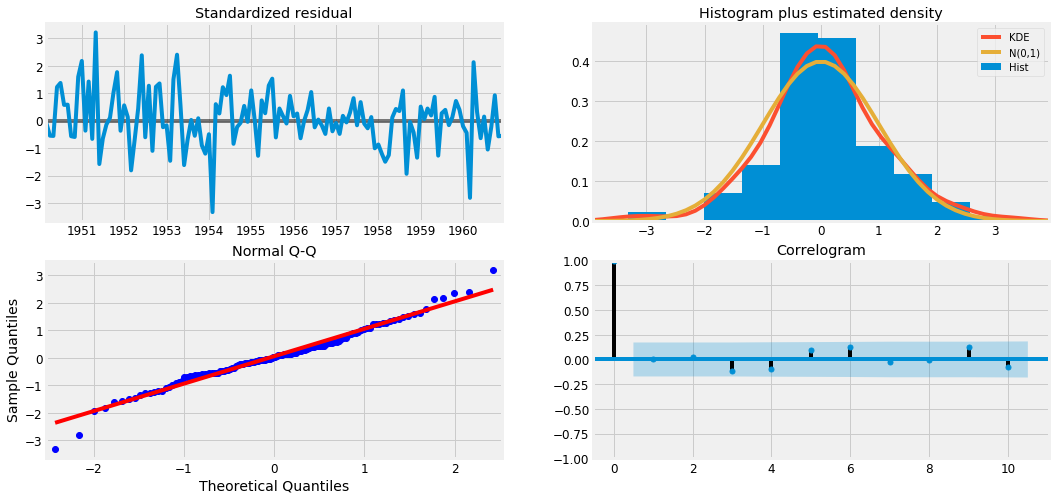

In [29]:
results.plot_diagnostics(figsize = (16,8))
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

1.In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed. 2.The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed. 3.The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

# Validating Forecasts

In [30]:
#obtain values of forecasts from 1958
pred = results.get_prediction(start = '1958-01-01', dynamic = False)

Note: The dynamic = False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.

In [31]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


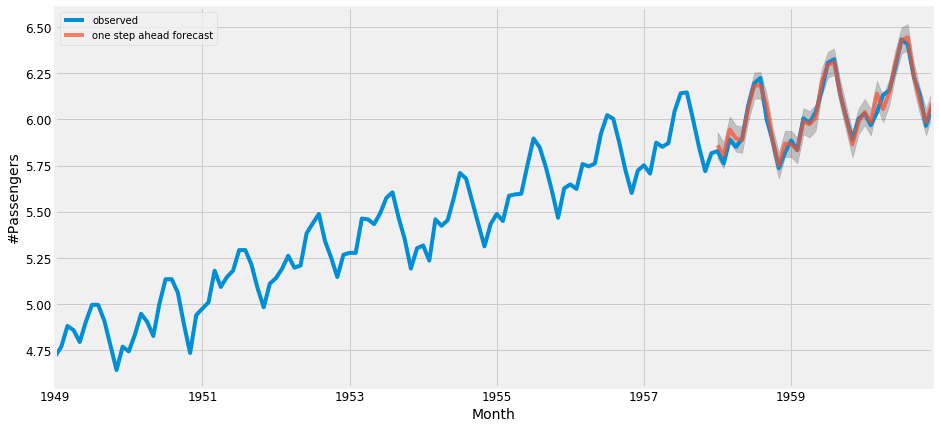

In [32]:
pred_ci = pred.conf_int()

ax = y['1949':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'one step ahead forecast', alpha = 0.7, figsize = (14,7))

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k' , alpha = 0.2)

ax.set_xlabel('Month')
ax.set_ylabel('#Passengers')
plt.legend()
plt.show()

In [33]:
y_forecasted = pred.predicted_mean
y_truth = y['1953':]

# MSE and RMSE

In [34]:
mse = ((y_forecasted - y_truth)**2).mean()
print("Mean squared error: {}".format(mse))

Mean squared error: 0.0012090197458520815


In [35]:
rmse = np.sqrt(mse)
print("Root Mean squared error: {}".format(rmse))

Root Mean squared error: 0.03477096124429236



Mean square error is almost zero. This means our prediction is very accurate.

# Producing and Visualizing Forecasts

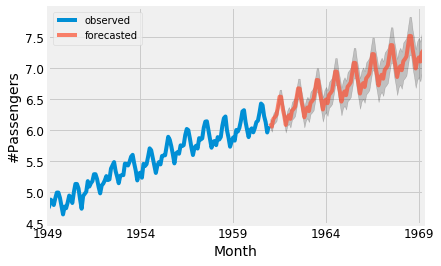

In [36]:
pred_after = results.get_forecast(steps = 100)
pred_cin = pred_after.conf_int()

ax = y['1949':].plot(label= 'observed')
pred_after.predicted_mean.plot(ax = ax, label = 'forecasted', alpha = 0.7)

ax.fill_between(pred_cin.index, pred_cin.iloc[:, 0], pred_cin.iloc[:, 1], alpha = 0.2, color = 'k')

ax.set_xlabel('Month')
ax.set_ylabel('#Passengers')
plt.legend()
plt.show()

# Back to Original Data

In [37]:
#Take exponential
pred_after = np.exp(pred_after.predicted_mean)
pred_cin = np.exp(pred_cin)
print(type(pred_after))

<class 'pandas.core.series.Series'>


In [38]:
pred_after

1961-01-01     453.231557
1961-02-01     428.604866
1961-03-01     486.816827
1961-04-01     501.102579
1961-05-01     519.818996
1961-06-01     601.030127
1961-07-01     695.551053
1961-08-01     693.835931
1961-09-01     577.144191
1961-10-01     511.754749
1961-11-01     440.350439
1961-12-01     492.115398
1962-01-01     514.292213
1962-02-01     485.695338
1962-03-01     552.954494
1962-04-01     569.398371
1962-05-01     590.989685
1962-06-01     685.189900
1962-07-01     795.138704
1962-08-01     793.015299
1962-09-01     657.117546
1962-10-01     581.184842
1962-11-01     498.524706
1962-12-01     558.301900
1963-01-01     583.909476
1963-02-01     550.749950
1963-03-01     628.584984
1963-04-01     647.595669
1963-05-01     672.592494
1963-06-01     782.046999
                 ...     
1966-11-01     834.333972
1966-12-01     943.048696
1967-01-01     989.855737
1967-02-01     929.050909
1967-03-01    1071.885728
1967-04-01    1106.923759
1967-05-01    1153.153414
1967-06-01  

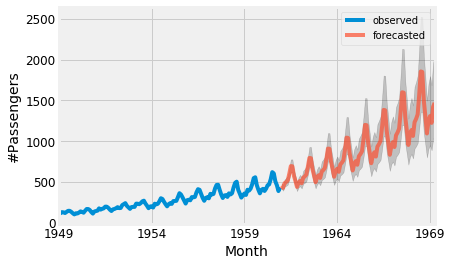

In [39]:
ax = np.exp(y)['1949':].plot(label= 'observed')
pred_after.plot(ax = ax, label = 'forecasted', alpha = 0.7)

ax.fill_between(pred_cin.index, pred_cin.iloc[:, 0], pred_cin.iloc[:, 1], alpha = 0.2, color = 'k')

ax.set_xlabel('Month')
ax.set_ylabel('#Passengers')
plt.legend()
plt.show()